In [16]:
%pip install -q pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Between two points:
Average time difference: 0.003000 seconds
Maximum time difference: 0.005000 seconds
Minimum time difference: 0.001000 seconds


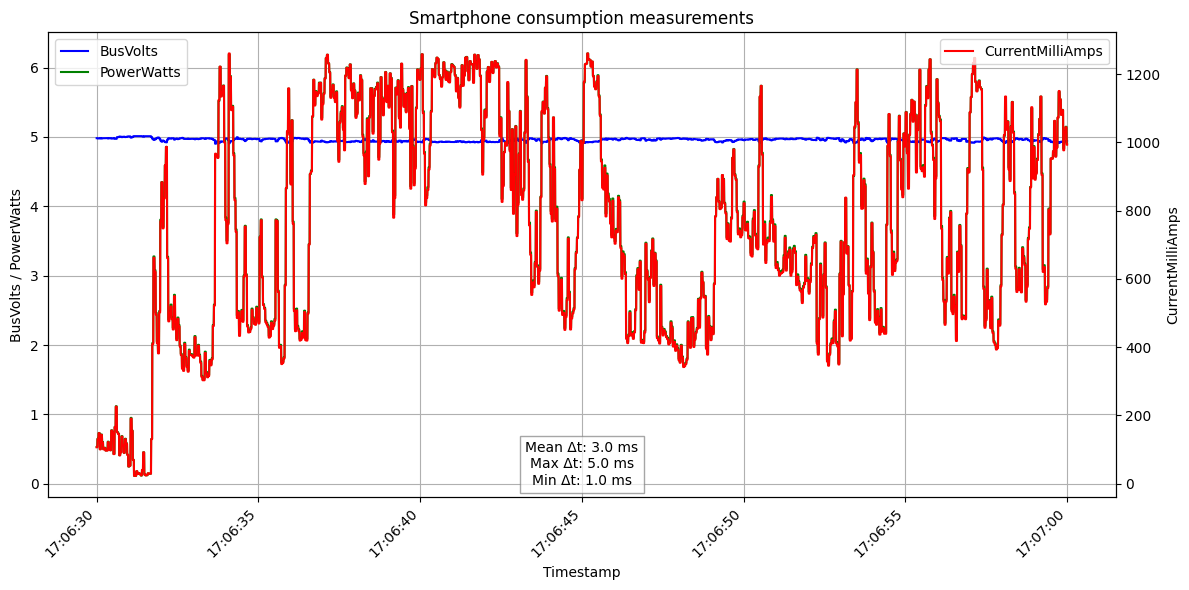

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
df = pd.read_csv('example.csv')

# Convert the Timestamp column to datetime if not already done
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Calculate time differences between successive points
time_deltas = df['Timestamp'].diff().dropna().dt.total_seconds()

mean_delta = time_deltas.mean()
max_delta = time_deltas.max()
min_delta = time_deltas.min()

print(f"\nBetween two points:")
print(f"Average time difference: {mean_delta:.6f} seconds")
print(f"Maximum time difference: {max_delta:.6f} seconds")
print(f"Minimum time difference: {min_delta:.6f} seconds")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot BusVolts and PowerWatts on the first axis
ax1.plot(df['Timestamp'], df['BusVolts'], label='BusVolts', color='blue')
ax1.plot(df['Timestamp'], df['PowerWatts'], label='PowerWatts', color='green')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('BusVolts / PowerWatts')
ax1.legend(loc='upper left')
ax1.grid()

# Add information on the plot
info_text = (
    f"Mean Δt: {mean_delta*1000:.1f} ms\n"
    f"Max Δt: {max_delta*1000:.1f} ms\n"
    f"Min Δt: {min_delta*1000:.1f} ms"
)

# Position the text in the lower center of the main plot
ax1.text(
    0.5, 0.02, info_text,
    transform=ax1.transAxes,
    fontsize=10,
    verticalalignment='bottom',
    horizontalalignment='center',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

# Set a tick every 5 seconds if too much data, otherwise every second
if len(df) > 50000:
    locator = mdates.SecondLocator(interval=5)
else:
    locator = mdates.SecondLocator()
ax1.xaxis.set_major_locator(locator)
# Use a more readable tick format and space labels to avoid overlap
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
fig.autofmt_xdate(rotation=45)

# Create a second axis for CurrentMilliAmps
ax2 = ax1.twinx()
ax2.plot(df['Timestamp'], df['CurrentMilliAmps'], label='CurrentMilliAmps', color='red')
ax2.set_ylabel('CurrentMilliAmps')
ax2.legend(loc='upper right')

ax1.set_title("Smartphone consumption measurements")
plt.tight_layout()
plt.show()

In [ ]:
# Check if everything is OK in the dataframe.
print("Rows where Timestamps are not in chronological order:")
print(non_ordered_rows if not non_ordered_rows.empty else "No unordered rows found.")

print("\nRows with duplicate Timestamps:")
print(duplicate_timestamps if not duplicate_timestamps.empty else "No duplicate Timestamps found.")

print("\nNumber of occurrences for each duplicate Timestamp:")
print(duplicate_counts if not duplicate_counts.empty else "No duplicates detected.")



Rows where Timestamps are not in chronological order:
No unordered rows found.

Rows with duplicate Timestamps:
No duplicate Timestamps found.

Number of occurrences for each duplicate Timestamp:
No duplicates detected.

Average time difference between two points: 0.002548 seconds
Maximum time difference: 0.055000 seconds
Minimum time difference: 0.002000 seconds
